# K-means clustering with Pew Data 
The task of this activity is to perform K means clustering with Pew Data with at least 5 columns and predicting one column. 

The data being used is the Pew Data for Gaming Jobs and Broadband Again.

In [24]:
data <- read.csv("data/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")
head(data)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


# Collecting Required Data
For this task, I am making use of 6 columns, which are as follows: 

1. Age
2. Income
3. Sex
4. Smartphone Ownership
5. Online Dating
6. Mobile App Dating (Prediction Label)

In [25]:
new_data <- data.frame(data$age,data$inc,data$sex,data$smart1,data$date1a,data$date2a)
names(new_data) <- c("age","inc","sex","smart1","date1a","date2a")

# Cleaning Data
For better analytics, I am cleaning the data by removing the users whose answers were "I do not know" or "Refused to Answer" for all of the columns. 

After that, I am normalizing all the values between 0 and 1 to make them all on the same scale. It makes it easier to plot and calculate K means for.

After that, I am removing all those rows where any value is null so that my K means clustering does not hapeen with a Null/NA value.

In [26]:
new_data <- new_data[new_data$age<97,]
new_data <- new_data[new_data$inc<98,]
new_data <- new_data[new_data$smart1<8,]
new_data <- new_data[new_data$date1a<8,]
new_data <- new_data[new_data$date2a<8,]

In [27]:
new_data$age <- new_data$age/100
new_data$inc <- new_data$inc/10
new_data$sex <- new_data$inc/10
new_data$smart1 <- new_data$smart1/10
new_data$date1a <- new_data$date1a/10
new_data$date2a <- new_data$date2a/10

In [28]:
new_data <- new_data[rowSums(is.na(new_data)) == 0,]

# Selecting Columns for K means
Selecting the first 5 columns as the columns for K means clustering and making the 6th column as a new variable, y.

In [29]:
x <- new_data[,-6]
y <- new_data$date2a

# K Means Clustering with 3 Centers
Performing K Means Clustering with 3 centers and then viewing the centers and the tally of original label and clustered data.

Finally, plotting the data on a graph of age vs income and defining the color as the cluster so as to differentiate the data.

In [35]:
kc <- kmeans(x,centers = 3)
kc$centers
table(y,kc$cluster)

,age,inc,sex,smart1,date1a
1,0.5802472,0.7364045,0.07364045,0.1,0.1894382
2,0.3193636,0.6657576,0.06657576,0.1,0.1793939
3,0.3988596,0.2622807,0.02622807,0.1,0.1824561


     
y       1   2   3
  0.1  19  49  58
  0.2 426 281 284

In [36]:
kc

K-means clustering with 3 clusters of sizes 445, 330, 342

Cluster means:
        age       inc        sex smart1    date1a
1 0.5802472 0.7364045 0.07364045    0.1 0.1894382
2 0.3193636 0.6657576 0.06657576    0.1 0.1793939
3 0.3988596 0.2622807 0.02622807    0.1 0.1824561

Clustering vector:
   2    4    6    9   13   14   16   20   26   29   32   33   36   38   41   44 
   1    2    1    1    1    1    2    1    2    1    1    3    3    3    3    3 
  47   50   51   55   57   60   65   69   70   73   77   79   80   83   84   85 
   1    1    2    2    1    1    1    1    1    1    1    2    1    1    1    1 
  87   88   89   90   91   92   98  104  107  108  109  111  127  131  133  134 
   3    1    1    1    3    3    1    1    1    1    1    1    3    3    1    2 
 136  141  143  147  148  151  152  160  161  163  165  167  171  173  178  183 
   3    1    1    2    2    3    1    1    1    1    3    2    1    1    1    1 
 184  185  191  193  196  199  200  203  208  209  212  21

### Interpreting Clusters
For interpreting the different clusters, we can just use the sum of square measure and the cluster size. As consistent the size of the clusters is and as low the sum of squares is, the better it is for our result.

For our 3 clusters, the values of the clusters are as follows (size,sum of squares)

1. 445, 11.748582
2. 330, 7.950336
3. 342, 13.712847

Since the sum of squares is pretty small for the 2nd cluster, we can say that this cluster is a tight fit.

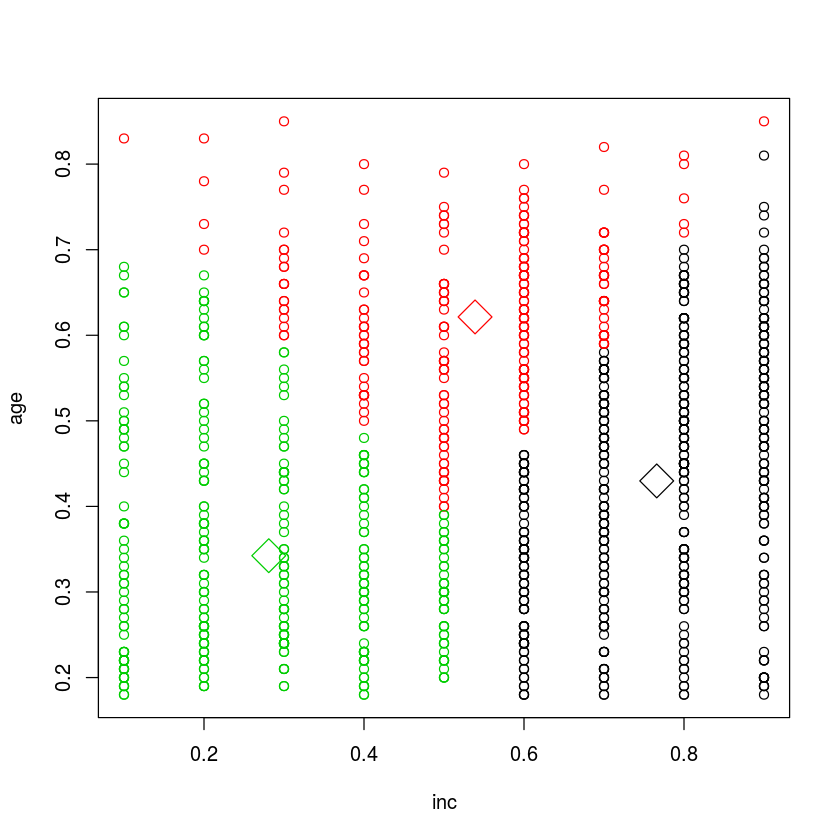

In [32]:
plot(x[c("inc", "age")], col=kc$cluster)
points(kc$centers[,c("inc", "age")], col=1:3, pch=23, cex=3)

# K Means Clustering with 5 Centers
Performing K Means Clustering with 5 centers and then viewing the centers and the tally of original label and clustered data.

Finally, plotting the data on a graph of age vs income and defining the color as the cluster so as to differentiate the data.

In [38]:
kc5 <- kmeans(x,centers = 5)
kc5$centers
table(y,kc5$cluster)

,age,inc,sex,smart1,date1a
1,0.2810667,0.2000000,0.02000000,0.1,0.1820000
2,0.4405246,0.8288525,0.08288525,0.1,0.1862295
3,0.6261024,0.6606299,0.06606299,0.1,0.1913386
4,0.3137313,0.5507463,0.05507463,0.1,0.1757463
5,0.5741429,0.2778571,0.02778571,0.1,0.1864286


     
y       1   2   3   4   5
  0.1  33  23   9  49  12
  0.2 117 282 245 219 128

In [39]:
kc5

K-means clustering with 5 clusters of sizes 150, 305, 254, 268, 140

Cluster means:
        age       inc        sex smart1    date1a
1 0.2810667 0.2000000 0.02000000    0.1 0.1820000
2 0.4405246 0.8288525 0.08288525    0.1 0.1862295
3 0.6261024 0.6606299 0.06606299    0.1 0.1913386
4 0.3137313 0.5507463 0.05507463    0.1 0.1757463
5 0.5741429 0.2778571 0.02778571    0.1 0.1864286

Clustering vector:
   2    4    6    9   13   14   16   20   26   29   32   33   36   38   41   44 
   3    4    3    3    2    3    2    3    2    3    3    1    5    5    5    4 
  47   50   51   55   57   60   65   69   70   73   77   79   80   83   84   85 
   3    3    2    2    2    2    2    3    3    3    2    2    3    2    3    2 
  87   88   89   90   91   92   98  104  107  108  109  111  127  131  133  134 
   4    2    3    3    5    5    3    2    2    2    2    2    5    1    2    2 
 136  141  143  147  148  151  152  160  161  163  165  167  171  173  178  183 
   5    3    3    4    4    5

### Interpreting Clusters
For interpreting the different clusters, we can just use the sum of square measure and the cluster size. The lower the sum of squares is in a cluster, the tigher cluster it is.

For our 5 clusters, the values of the clusters are as follows (size,sum of squares)

1. 150, 1.817029 
2. 305, 6.249039 
3. 254, 4.518348 
4. 268, 4.979769 
5. 140, 3.142782

Since the sum of squares is pretty small for the 1st cluster, the fit for that cluster is is pretty tight.

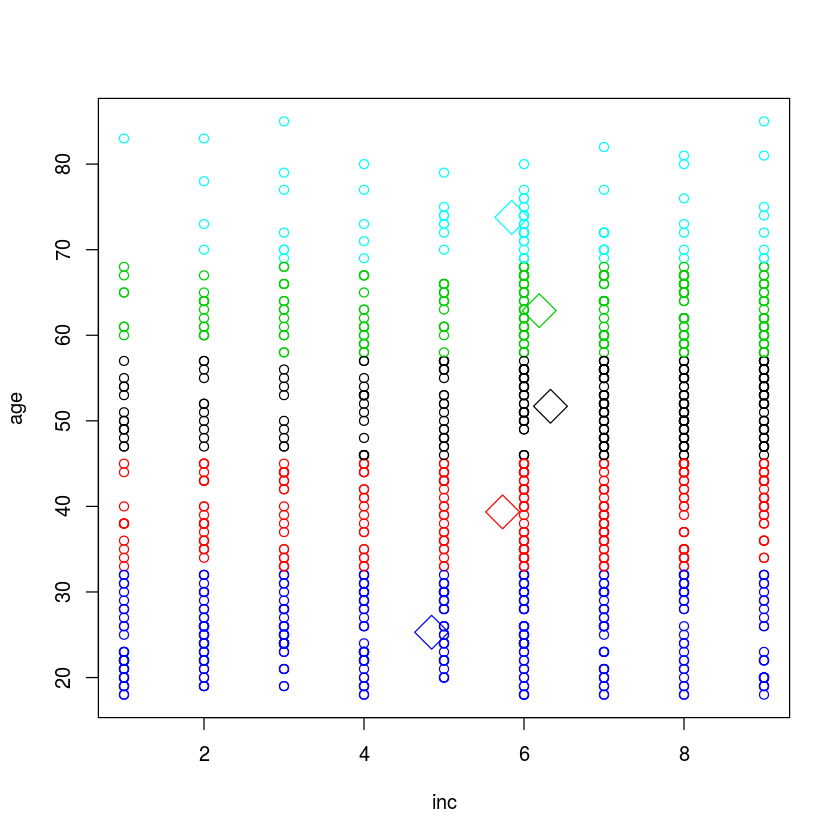

In [9]:
plot(x[c("inc", "age")], col=kc5$cluster)
points(kc5$centers[,c("inc", "age")], col=1:5, pch=23, cex=3)

# Overall Interpretation
Overall when changing the value of k, as in the number of centers for all our clusters, we can see that each pf the cluster gets a tighter fit as the size of k increases. This is because there are multiple clusters for each data value to go into. This reduces the sum of squares in every cluster and gives a more tighter fit for the same data. 
